In [1]:
import pandas as pd
import numpy as np
# 统计notavailable的情况
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False  
import seaborn as sns

file_path="../latex/tex/figures/"

In [3]:
# 在这里修改路径
data=pd.read_csv("Beijing-result-2022-06-21.csv",index_col=0)
print("展示表格")
print(data.shape)
print(data.head())



展示表格
(26204, 95)
   listing_id  adjusted_price  notavailable  sentiment  is_description  \
0   2797791.0          1800.0      0.892720  -0.089427             1.0   
1   2797791.0          2500.0      0.903846  -0.089427             1.0   
2   6207089.0           388.0      0.000000   0.717351             1.0   
3   6207089.0           398.0      1.000000   0.717351             1.0   
4   6207089.0           488.0      1.000000   0.717351             1.0   

   is_neighborhood_overview  is_host_about  host_response_rate  \
0                       1.0            1.0                 1.0   
1                       1.0            1.0                 1.0   
2                       1.0            1.0                 1.0   
3                       1.0            1.0                 1.0   
4                       1.0            1.0                 1.0   

   host_acceptance_rate  host_is_superhost  ...  neighbourhood_cleansed6  \
0                   0.4                0.0  ...                  

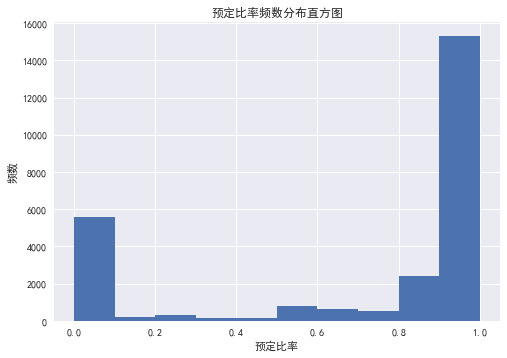

In [4]:
# 展示预定比率分布直方图
plt.hist(data.notavailable);
plt.xlabel("预定比率");
plt.ylabel("频数");
plt.title("预定比率频数分布直方图");
plt.savefig(file_path+"预定比率直方图.png",dpi=300)
plt.show();



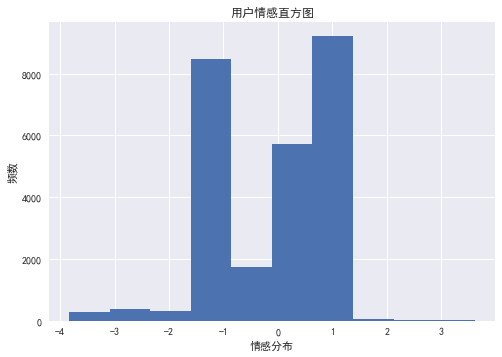

In [5]:
# 评论情感统计
from sklearn.preprocessing import StandardScaler
plt.hist(StandardScaler().fit_transform(data.sentiment.to_numpy().reshape(-1,1)).reshape(len(data.sentiment)));
plt.title("用户情感直方图")
plt.xlabel("情感分布")
plt.ylabel("频数")
plt.savefig(file_path+"情感分布直方图.png",dpi=300)
plt.show();



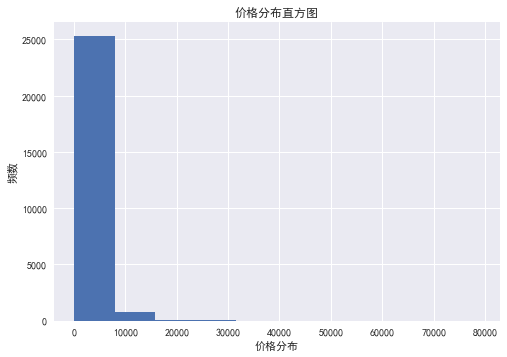

In [6]:
# adjusted_price 价格分布直方图

plt.hist(data.adjusted_price.to_numpy());
plt.title("价格分布直方图")
plt.xlabel("价格分布")
plt.ylabel("频数")
plt.savefig(file_path+"价格分布直方图.png",dpi=300)
plt.show();



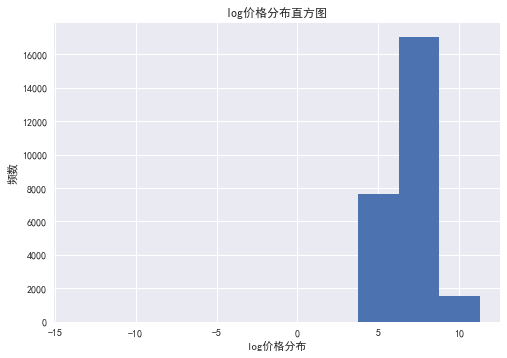

In [7]:
plt.hist(np.log(data.adjusted_price+1e-6));
plt.title("log价格分布直方图")
plt.xlabel("log价格分布")
plt.ylabel("频数")
plt.savefig(file_path+"log价格分布直方图.png",dpi=300)
plt.show();



In [8]:
# 正式对数据进行变换
data.adjusted_price=np.log(data.adjusted_price+1e-6)


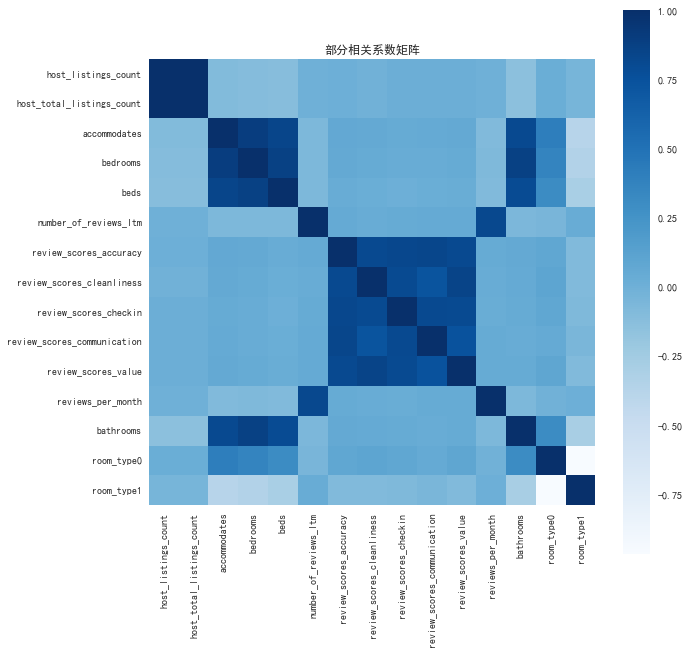

In [20]:
plt.figure(figsize=(10,10))
corr=data.loc[:,"adjusted_price":].corr()
res_column=[]
for column in corr.columns:
    if np.any(np.abs(corr.loc[[j for j in corr.columns if j!=column],column])>0.8):
        res_column.append(column)
sns.heatmap(corr.loc[res_column,res_column], vmax=1, square=True,
            cmap="Blues")
plt.title("部分相关系数矩阵");
plt.savefig(file_path+"相关系数矩阵.png",dpi=300)
plt.show();

In [21]:
# 尝试删除强相关变量
data_corr=data.corr()
for i in data_corr.index:
    for j in data_corr.columns:
        if data_corr.loc[i,j]>0.8 and i!=j:
            print(i,j, data_corr.loc[i,j])
#  data_corr[data_corr>0.8]


host_listings_count host_total_listings_count 1.0
host_total_listings_count host_listings_count 1.0
accommodates bedrooms 0.8941839202075409
accommodates beds 0.8454994710753739
accommodates bathrooms 0.8141798898393677
bedrooms accommodates 0.8941839202075409
bedrooms beds 0.87119025746937
bedrooms bathrooms 0.8764846648273882
beds accommodates 0.8454994710753739
beds bedrooms 0.87119025746937
number_of_reviews_ltm reviews_per_month 0.8211311061662457
review_scores_accuracy review_scores_cleanliness 0.8084682990659124
review_scores_accuracy review_scores_checkin 0.826173490895302
review_scores_accuracy review_scores_communication 0.8337041150460677
review_scores_accuracy review_scores_value 0.8098301695549073
review_scores_cleanliness review_scores_accuracy 0.8084682990659124
review_scores_cleanliness review_scores_checkin 0.8039793537483803
review_scores_cleanliness review_scores_value 0.8533697068025763
review_scores_checkin review_scores_accuracy 0.826173490895302
review_scores_che

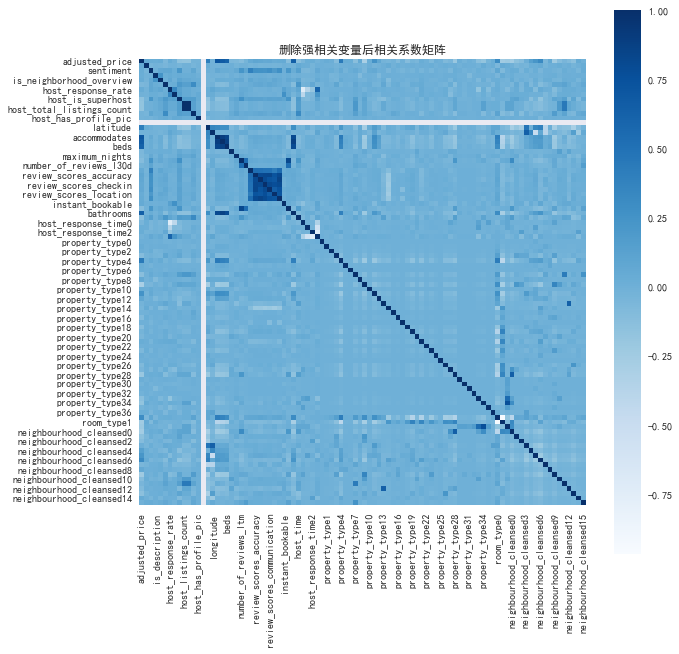

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data.loc[:,"adjusted_price":].corr(), vmax=1, square=True,
            cmap="Blues")
plt.title("删除强相关变量后相关系数矩阵");

plt.show();

In [23]:
# 对变量进行标准化
X_columns=[i for i in data.columns if i!="listing_id" and i!="notavailable"]
X=data.loc[:,X_columns].copy()
y=data.loc[:,"notavailable"].copy()
from sklearn.preprocessing import StandardScaler
clf=StandardScaler()
X=clf.fit_transform(X)

X_columns=[i for i in data.columns if i!="listing_id" and i!="notavailable"]
X=data.loc[:,X_columns].copy()
y=data.loc[:,"notavailable"].copy()

In [24]:
# 删掉强相关变量
print("正在删除强相关变量...")
print("删除前:",data.shape)
data=data.drop("host_listings_count",axis=1)
data=data.drop("accommodates",axis=1)
data=data.drop("beds",axis=1)
data=data.drop("number_of_reviews_l30d",axis=1)
data=data.drop("review_scores_communication",axis=1)
print("删除完成",data.shape)


正在删除强相关变量...
删除前: (26204, 95)
删除完成 (26204, 90)


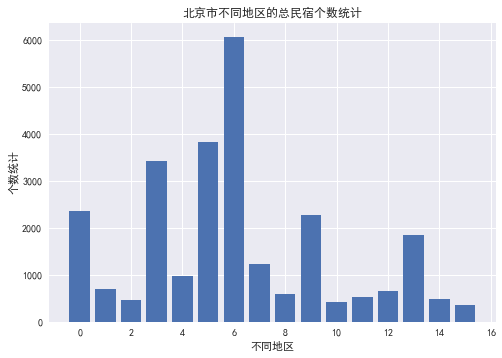

In [25]:
neighbors=np.sum(data.loc[:,"neighbourhood_cleansed0":"neighbourhood_cleansed15"])
plt.bar([i for i in range(len(neighbors))],neighbors);
plt.xlabel("不同地区")
plt.ylabel("个数统计")
plt.title("北京市不同地区的总民宿个数统计");
plt.savefig(file_path+"不同地区民俗个数.png",dpi=300)
plt.show();



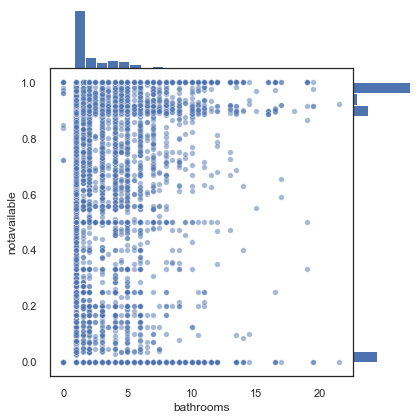

In [26]:
# bathrooms 和 notavailable之间的关系
sns.set_theme(style="white")
data_copy=data.copy().sort_values(by="bathrooms")
g = sns.JointGrid(data=data_copy, x="bathrooms", y="notavailable", space=0)
g.plot_joint(sns.scatterplot, s=30, alpha=.5)
g.plot_marginals(sns.histplot,  alpha=1, bins=25)#color="blue",
plt.show();



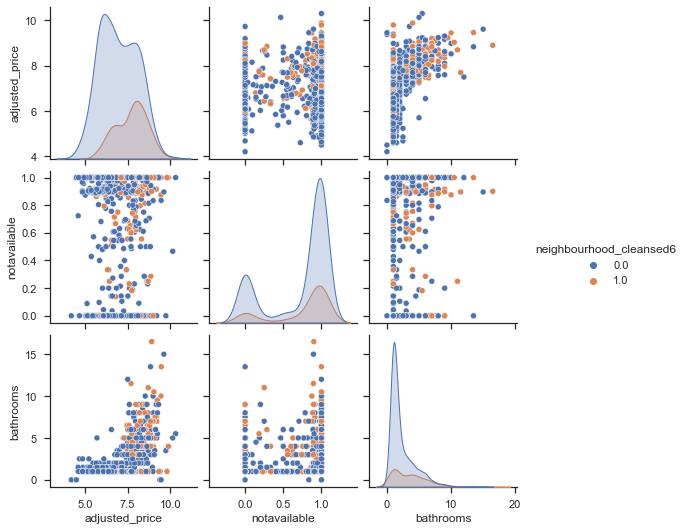

In [27]:
sns.set_theme(style="ticks")
sns.pairplot(data.loc[:,["adjusted_price","notavailable","bathrooms","neighbourhood_cleansed6"]].sample(1000),hue="neighbourhood_cleansed6")
plt.savefig(file_path+"散点图矩阵.png",dpi=300)
plt.show()